## Import necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

## Import data

In [2]:
delivery_time_data = pd.read_csv("delivery_time.csv")

In [3]:
delivery_time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data understanding

In [4]:
delivery_time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delivery_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
delivery_time_data.shape

(21, 2)

In [8]:
delivery_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Assumptions check

## 1. Normality Test

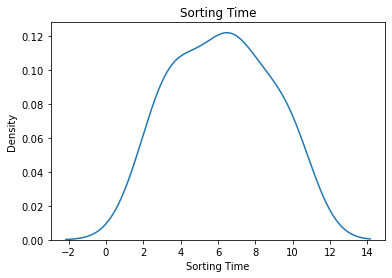

In [9]:
sns.distplot(a=delivery_time_data['Sorting Time'],hist=False)
plt.title('Sorting Time')
plt.show()

In [10]:
delivery_time_data['Sorting Time'].skew() ## We accept the skewness as it is in the acceptance level

0.047115474210530174

In [11]:
delivery_time_data['Sorting Time'].kurtosis() ## We accept the kurtosis as the value lies between -3 to +3 ##acceptance level##

-1.14845514534878

## 2. Linearity Test

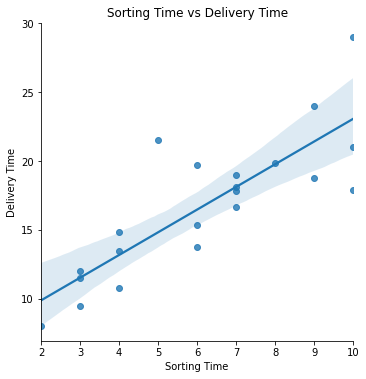

In [12]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_time_data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

## Data Preparation

In [13]:
delivery_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [14]:
delivery_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [15]:
delivery_time_data=delivery_time_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery_time_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Model Building

## Using statsmodel (OLS) build Linear Regression

In [16]:
linear_model = smf.ols(formula = 'delivery_time~sorting_time',data=delivery_time_data).fit()

## Model Training

In [17]:
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
linear_model.pvalues, linear_model.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [19]:
linear_model.rsquared , linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Testing

## Manual Prediction

In [20]:
# For say sorting time is 10 (x=10)
deliveryTime = (1.649020) * (10) + (6.582734)
deliveryTime

23.072933999999997

## Automatic Prediction : For say sorting time is 10,18

In [21]:
new_data = pd.Series([10,18])
new_data

0    10
1    18
dtype: int64

In [22]:
dTime = pd.DataFrame(new_data,columns=['sorting_time'])
dTime

,sorting_time
0,10
1,18


In [23]:
linear_model.predict(dTime)

0    23.072933
1    36.265092
dtype: float64

## If sorting time = 10, delivery time = 23.07
## If sorting time = 18, delivery time = 36.26